<a href="https://colab.research.google.com/github/Aishwarya-byte21/forest-cover-prediction/blob/main/Forest1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Import required libraries

df = pd.read_csv("/content/cover_type (1).csv")

df.head()


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type,Wilderness_Area,Soil_Type
0,2596,51,3,258,0,510,221,232,148,6279,Aspen,1,29
1,2590,56,2,212,-6,390,220,235,151,6225,Aspen,1,29
2,2804,139,9,268,65,3180,234,238,135,6121,Lodgepole Pine,1,12
3,2785,155,18,242,118,3090,238,238,122,6211,Lodgepole Pine,1,30
4,2595,45,2,153,-1,391,220,234,150,6172,Aspen,1,29


In [ ]:
df.shape


(145890, 13)

In [ ]:
df["Cover_Type"].unique()


array(['Aspen', 'Lodgepole Pine', 'Spruce/Fir', 'Krummholz',
       'Ponderosa Pine', 'Douglas-fir', 'Cottonwood/Willow'], dtype=object)

In [ ]:
#Target variable analysis
df["Cover_Type"].value_counts()


,count
Cover_Type,
Lodgepole Pine,103071
Spruce/Fir,31110
Aspen,3069
Krummholz,2160
Ponderosa Pine,2160
Douglas-fir,2160
Cottonwood/Willow,2160


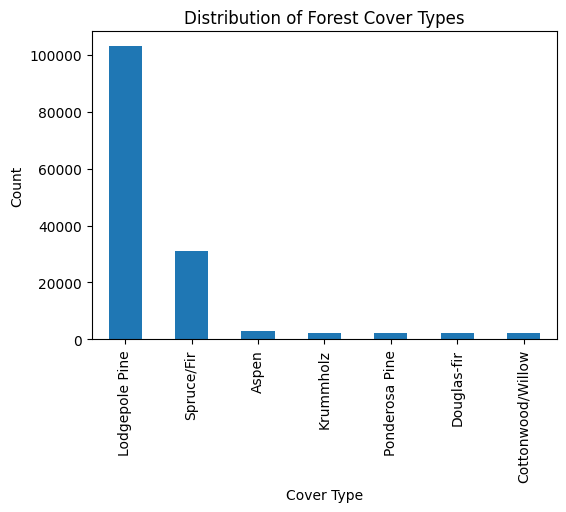

In [ ]:
plt.figure(figsize=(6,4))
df['Cover_Type'].value_counts().plot(kind='bar')
plt.title('Distribution of Forest Cover Types')
plt.xlabel('Cover Type')
plt.ylabel('Count')
plt.show()


In [ ]:
df.isnull().sum().sum()


np.int64(0)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145890 entries, 0 to 145889
Data columns (total 13 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   Elevation                           145890 non-null  int64 
 1   Aspect                              145890 non-null  int64 
 2   Slope                               145890 non-null  int64 
 3   Horizontal_Distance_To_Hydrology    145890 non-null  int64 
 4   Vertical_Distance_To_Hydrology      145890 non-null  int64 
 5   Horizontal_Distance_To_Roadways     145890 non-null  int64 
 6   Hillshade_9am                       145890 non-null  int64 
 7   Hillshade_Noon                      145890 non-null  int64 
 8   Hillshade_3pm                       145890 non-null  int64 
 9   Horizontal_Distance_To_Fire_Points  145890 non-null  int64 
 10  Cover_Type                          145890 non-null  object
 11  Wilderness_Area                     145

In [ ]:
df.describe()


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area,Soil_Type
count,145890.000000,145890.000000,145890.000000,145890.000000,145890.000000,145890.000000,145890.000000,145890.000000,145890.000000,145890.000000,145890.000000,145890.000000
mean,2874.458949,141.127418,11.925574,251.824738,34.554322,3313.827541,217.368106,224.874748,139.788203,3044.958105,1.186593,23.364905
std,210.801279,107.719296,6.319326,192.473899,41.215776,1687.779953,21.590298,16.084851,31.311690,1761.882341,0.656571,8.215184
min,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000,1.000000,1.000000
25%,2747.000000,54.000000,7.000000,95.000000,7.000000,1848.000000,207.000000,216.000000,121.000000,1608.000000,1.000000,12.000000
50%,2909.000000,108.000000,11.000000,212.000000,23.000000,3420.000000,222.000000,226.000000,140.000000,2713.000000,1.000000,29.000000
75%,3004.000000,217.000000,15.000000,362.000000,51.000000,4673.000000,232.000000,236.000000,159.000000,4478.000000,1.000000,29.000000
max,3849.000000,360.000000,61.000000,1343.000000,554.000000,7117.000000,254.000000,254.000000,248.000000,7173.000000,4.000000,40.000000


In [ ]:
df.isnull().sum()


,0
Elevation,0
Aspect,0
Slope,0
Horizontal_Distance_To_Hydrology,0
Vertical_Distance_To_Hydrology,0
Horizontal_Distance_To_Roadways,0
Hillshade_9am,0
Hillshade_Noon,0
Hillshade_3pm,0
Horizontal_Distance_To_Fire_Points,0


In [ ]:
df.duplicated().sum()


np.int64(0)

In [ ]:
df["Cover_Type"].value_counts()


,count
Cover_Type,
Lodgepole Pine,103071
Spruce/Fir,31110
Aspen,3069
Krummholz,2160
Ponderosa Pine,2160
Douglas-fir,2160
Cottonwood/Willow,2160


In [ ]:
df["Cover_Type"].value_counts(normalize=True) * 100


,proportion
Cover_Type,
Lodgepole Pine,70.649805
Spruce/Fir,21.324285
Aspen,2.103640
Krummholz,1.480568
Ponderosa Pine,1.480568
Douglas-fir,1.480568
Cottonwood/Willow,1.480568


In [ ]:
X = df.drop("Cover_Type", axis=1)
y = df["Cover_Type"]


In [ ]:
X.isnull().sum().sum()


np.int64(0)

In [ ]:
from sklearn.impute import SimpleImputer
import pandas as pd

imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X)

X = pd.DataFrame(X_imputed, columns=X.columns)


In [ ]:
imputer.fit_transform(X)


array([[2.596e+03, 5.100e+01, 3.000e+00, ..., 6.279e+03, 1.000e+00,
        2.900e+01],
       [2.590e+03, 5.600e+01, 2.000e+00, ..., 6.225e+03, 1.000e+00,
        2.900e+01],
       [2.804e+03, 1.390e+02, 9.000e+00, ..., 6.121e+03, 1.000e+00,
        1.200e+01],
       ...,
       [2.829e+03, 8.000e+01, 7.000e+00, ..., 1.550e+03, 1.000e+00,
        2.900e+01],
       [2.826e+03, 1.210e+02, 7.000e+00, ..., 1.528e+03, 1.000e+00,
        2.900e+01],
       [2.823e+03, 1.320e+02, 1.200e+01, ..., 1.506e+03, 1.000e+00,
        1.000e+00]])

In [ ]:
num_cols = X.columns


In [ ]:
Q1 = X[num_cols].quantile(0.25)
Q3 = X[num_cols].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


In [ ]:
X[num_cols] = X[num_cols].clip(
    lower=lower_bound,
    upper=upper_bound,
    axis=1
)


In [ ]:
X.describe().T


,count,mean,std,min,25%,50%,75%,max
Elevation,145890.0,2877.778902,198.061871,2361.5,2747.0,2909.0,3004.0,3389.5
Aspect,145890.0,141.127418,107.719296,0.0,54.0,108.0,217.0,360.0
Slope,145890.0,11.823237,6.004387,0.0,7.0,11.0,15.0,27.0
Horizontal_Distance_To_Hydrology,145890.0,249.990496,186.589869,0.0,95.0,212.0,362.0,762.5
Vertical_Distance_To_Hydrology,145890.0,32.558524,34.623925,-59.0,7.0,23.0,51.0,117.0
Horizontal_Distance_To_Roadways,145890.0,3313.827541,1687.779953,0.0,1848.0,3420.0,4673.0,7117.0
Hillshade_9am,145890.0,218.013359,19.599968,169.5,207.0,222.0,232.0,254.0
Hillshade_Noon,145890.0,225.156145,15.155102,186.0,216.0,226.0,236.0,254.0
Hillshade_3pm,145890.0,139.980478,30.315992,64.0,121.0,140.0,159.0,216.0
Horizontal_Distance_To_Fire_Points,145890.0,3044.958105,1761.882341,0.0,1608.0,2713.0,4478.0,7173.0


In [ ]:
skewness = X.skew().sort_values(ascending=False)
skewness


,0
Vertical_Distance_To_Hydrology,0.861265
Horizontal_Distance_To_Hydrology,0.792349
Aspect,0.689432
Slope,0.621361
Horizontal_Distance_To_Fire_Points,0.365249
Wilderness_Area,0.000000
Hillshade_3pm,-0.001189
Horizontal_Distance_To_Roadways,-0.058240
Elevation,-0.340370
Hillshade_Noon,-0.505363


In [ ]:
skewed_cols = skewness[skewness > 1].index
skewed_cols


Index([], dtype='object')

In [ ]:
import numpy as np

for col in skewed_cols:
    X[col] = np.log1p(X[col])


In [ ]:
X[skewed_cols].skew()


,0


In [ ]:
X["Hydrology_Road_Ratio"] = (
    X["Horizontal_Distance_To_Hydrology"] /
    (X["Horizontal_Distance_To_Roadways"] + 1)
)


In [ ]:
X["Hillshade_Diff"] = X["Hillshade_Noon"] - X["Hillshade_9am"]
X["Hillshade_Range"] = X["Hillshade_3pm"] - X["Hillshade_9am"]


In [ ]:
X['Hillshade_Mean'] = (
    X['Hillshade_9am'] +
    X['Hillshade_Noon'] +
    X['Hillshade_3pm']
) / 3


In [ ]:
categorical_cols = ['Soil_Type', 'Wilderness_Area']


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


In [ ]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', encoder, categorical_cols)
    ],
    remainder='passthrough'
)


In [ ]:
X = df.drop('Cover_Type', axis=1)
y = df['Cover_Type']

X_encoded = preprocessor.fit_transform(X)


In [ ]:
import joblib

joblib.dump(preprocessor, 'feature_encoder.pkl')
print("Encoder saved successfully")


Encoder saved successfully


In [ ]:
X_new = pd.DataFrame([{
    "Elevation": 3000,
    "Aspect": 120,
    "Slope": 10,
    "Horizontal_Distance_To_Hydrology": 200,
    "Vertical_Distance_To_Hydrology": 5,
    "Horizontal_Distance_To_Roadways": 300,
    "Hillshade_9am": 220,
    "Hillshade_Noon": 235,
    "Hillshade_3pm": 210,
    "Horizontal_Distance_To_Fire_Points": 1000,
    "Wilderness_Area": "Rawah",
    "Soil_Type": "Aspen"
}])


In [ ]:
encoder = joblib.load('feature_encoder.pkl')
X_new_encoded = encoder.transform(X_new)


In [ ]:
encoder = joblib.load('feature_encoder.pkl')

X_new_encoded = encoder.transform(X_new)


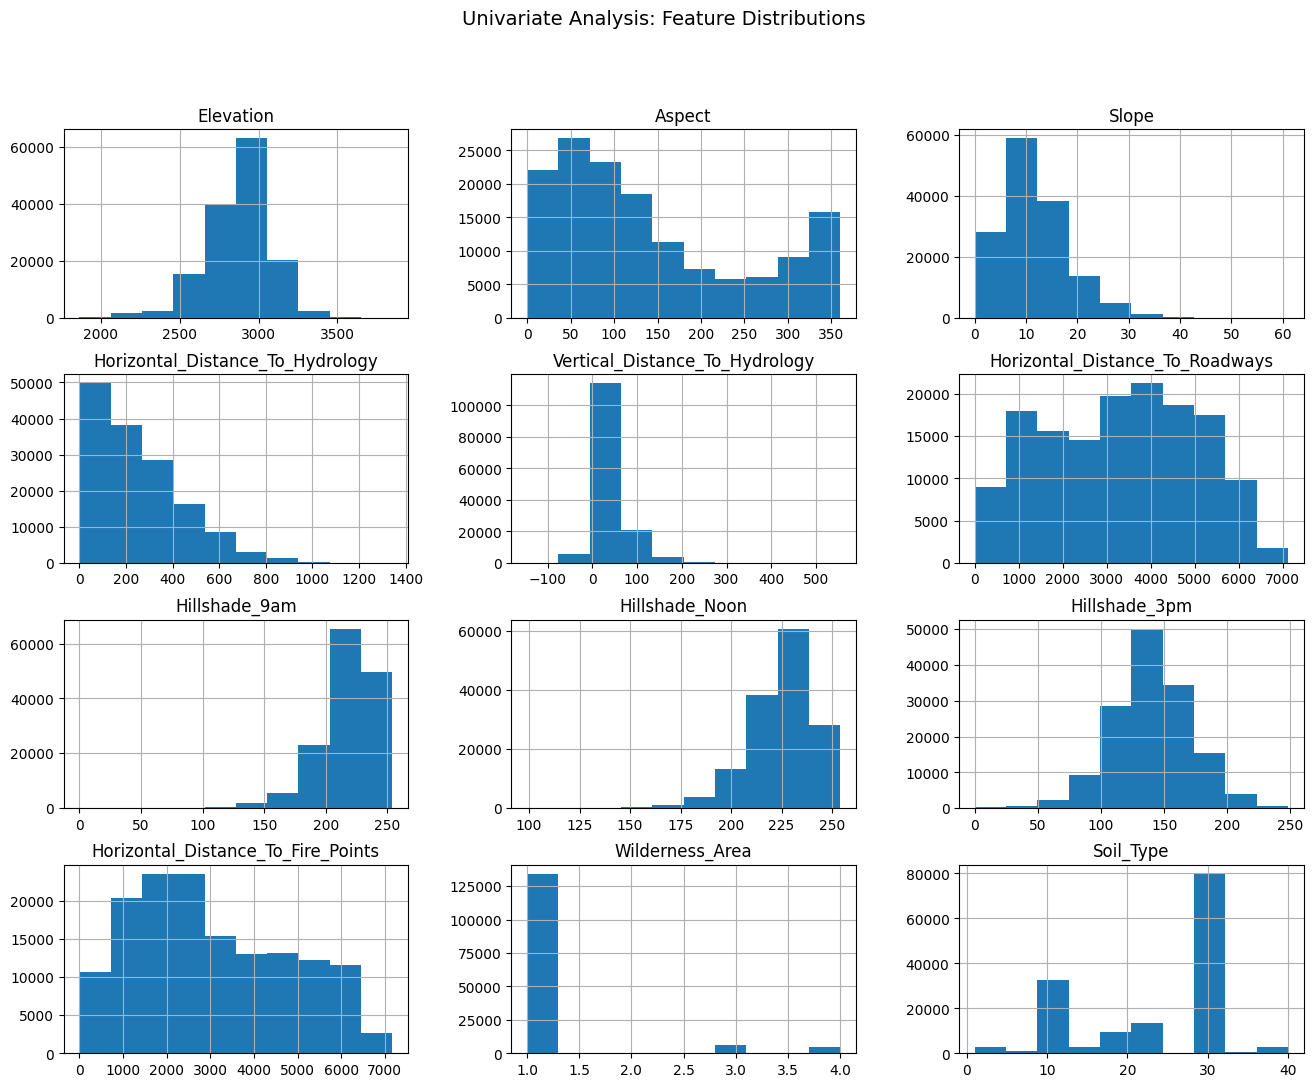

In [ ]:
#Univariate Analysis (Feature Distributions)
#Numerical feature distributions (Histograms)
import matplotlib.pyplot as plt

df.hist(figsize=(16,12))
plt.suptitle("Univariate Analysis: Feature Distributions", fontsize=14)
plt.show()


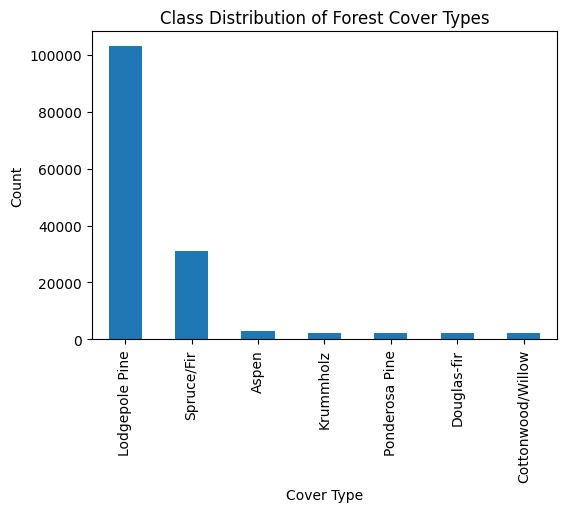

In [ ]:
#Class Imbalance Visualization
plt.figure(figsize=(6,4))
df['Cover_Type'].value_counts().plot(kind='bar')
plt.title("Class Distribution of Forest Cover Types")
plt.xlabel("Cover Type")
plt.ylabel("Count")
plt.show()


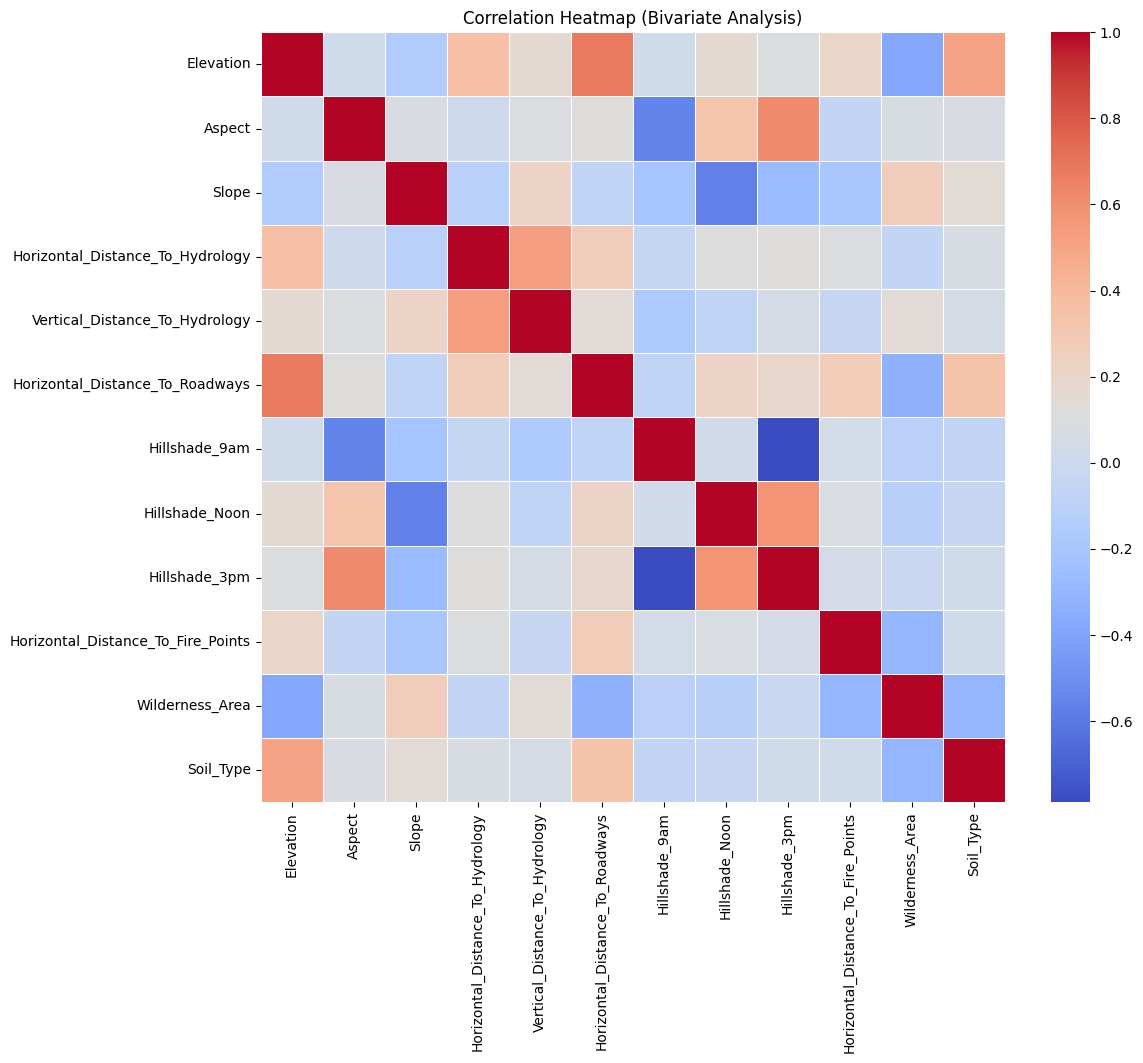

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(
    df.select_dtypes(include=np.number).corr(),
    cmap='coolwarm',
    linewidths=0.5
)
plt.title("Correlation Heatmap (Bivariate Analysis)")
plt.show()


In [ ]:
#training baseline Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)


RandomForestClassifier(n_jobs=-1, random_state=42)

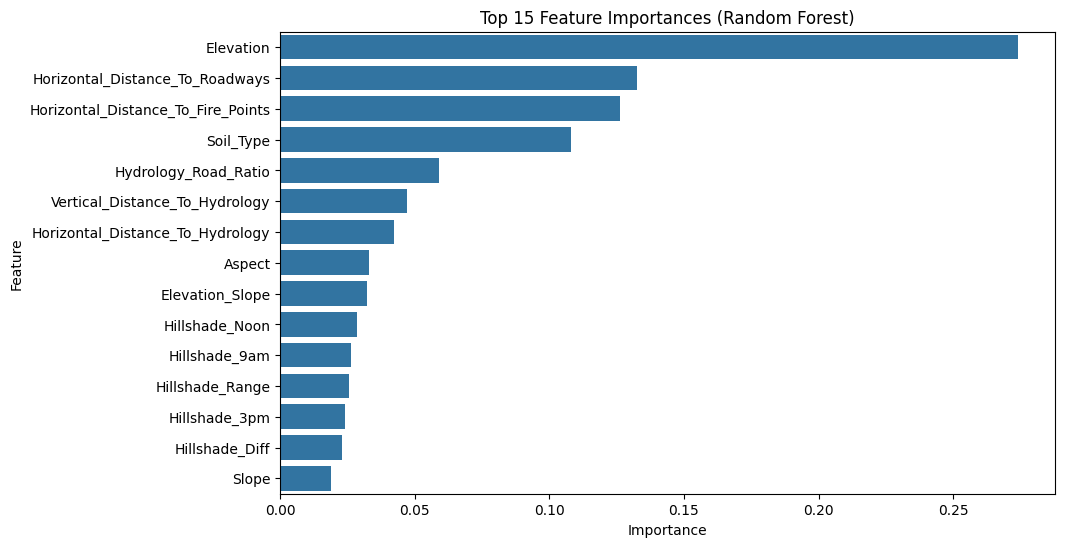

In [ ]:
import pandas as pd
import numpy as np

importances = rf.feature_importances_
feature_names = X.columns

feat_imp = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False).head(15)

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feat_imp)
plt.title("Top 15 Feature Importances (Random Forest)")
plt.show()


In [ ]:
import pandas as pd

pd.Series(y_train).value_counts()


,count
4,82457
6,24888
0,2455
1,1728
5,1728
3,1728
2,1728


In [ ]:
#Class Imbalance Handling by using ROS techniques to balance class distribution in the training data
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)


In [ ]:
pd.Series(y_train_ros).value_counts()


,count
4,82457
5,82457
1,82457
6,82457
3,82457
0,82457
2,82457


In [ ]:
X_train_ros, y_train_ros   # balanced train data
X_test, y_test


(        Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
 60484      3185.0   135.0    1.0                             450.0   
 18917      2850.0     4.0   18.0                             134.0   
 103094     2622.0   153.0    7.0                             331.0   
 101453     2962.0    67.0    8.0                             339.0   
 44081      2919.0   300.0    8.0                             162.0   
 ...           ...     ...    ...                               ...   
 33767      2641.0    38.0   17.0                             153.0   
 102969     2868.0   139.0   16.0                             212.0   
 61525      2935.0   105.0    3.0                             319.0   
 21707      2808.0   331.0   20.0                             108.0   
 112999     2662.0   314.0   20.0                             108.0   
 
         Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
 60484                             10.0                           3861

In [ ]:
#feature importance analysis
from sklearn.ensemble import RandomForestClassifier

rf_fs = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

rf_fs.fit(X_train_ros, y_train_ros)


RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42)

In [ ]:
import pandas as pd

importances = rf_fs.feature_importances_

feat_imp = pd.DataFrame({
    "Feature": X_train_ros.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

feat_imp.head(10)


,Feature,Importance
0,Elevation,0.262870
11,Soil_Type,0.167890
5,Horizontal_Distance_To_Roadways,0.125817
9,Horizontal_Distance_To_Fire_Points,0.107489
12,Hydrology_Road_Ratio,0.058006
3,Horizontal_Distance_To_Hydrology,0.044129
4,Vertical_Distance_To_Hydrology,0.033457
6,Hillshade_9am,0.031911
1,Aspect,0.030681
14,Hillshade_Range,0.029234


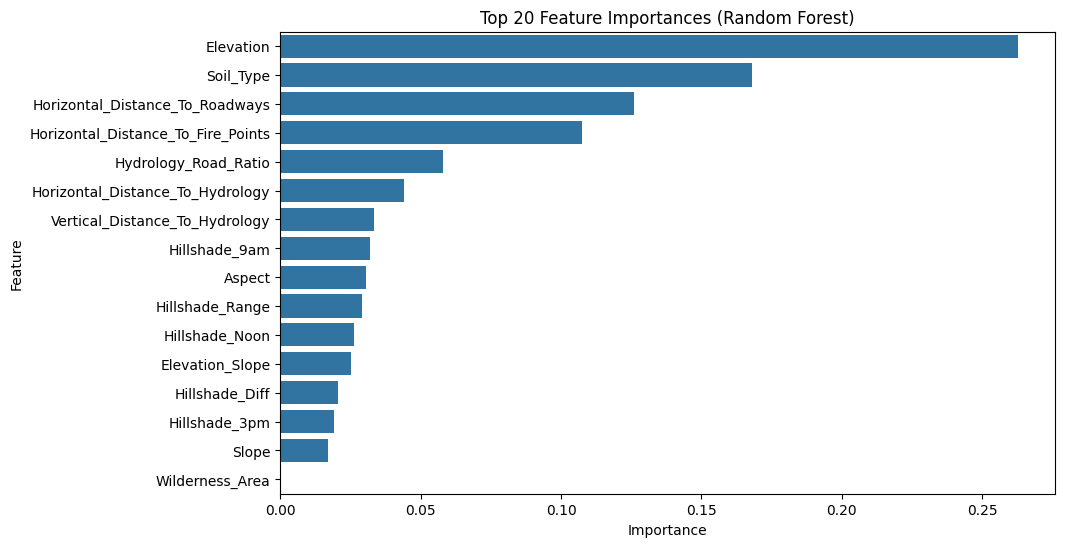

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

top_n = 20
plt.figure(figsize=(10, 6))
sns.barplot(
    x="Importance",
    y="Feature",
    data=feat_imp.head(top_n)
)
plt.title("Top 20 Feature Importances (Random Forest)")
plt.show()


In [ ]:
feat_imp["cumulative"] = feat_imp["Importance"].cumsum()

selected_features = feat_imp[
    feat_imp["cumulative"] <= 0.95
]["Feature"].tolist()

len(selected_features)


12

In [ ]:
X_train_sel = X_train_ros[selected_features]
X_test_sel  = X_test[selected_features]


In [ ]:
corr_matrix = X_train_sel.corr().abs()


In [ ]:
import numpy as np

corr_matrix = X_train_sel.corr().abs()

upper = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)

to_drop = [
    column for column in upper.columns
    if any(upper[column] > 0.9)
]

to_drop


['Hillshade_Range']

In [ ]:
X_train_sel = X_train_sel.drop(columns=to_drop)
X_test_sel  = X_test_sel.drop(columns=to_drop)


In [ ]:
#Model Building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score


In [ ]:
tree_models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Extra Trees": RandomForestClassifier(
        n_estimators=100, random_state=42, n_jobs=-1, bootstrap=False
    )
}


In [ ]:
scaled_models = {
    "Logistic Regression": LogisticRegression(
        max_iter=2000, multi_class="multinomial", solver="lbfgs", n_jobs=-1
    ),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM (RBF)": SVC(kernel="rbf")
}


In [ ]:
results = []

for name, model in tree_models.items():
    print(f"Training {name}...")

    model.fit(X_train_sel, y_train_ros)   # 🔥 FIX HERE
    y_pred = model.predict(X_test_sel)

    acc = accuracy_score(y_test, y_pred)
    f1  = f1_score(y_test, y_pred, average="weighted")

    results.append({
        "Model": name,
        "Accuracy": acc,
        "F1-Score": f1
    })


Training Decision Tree...
Training Random Forest...
Training AdaBoost...
Training Gradient Boosting...
Training Extra Trees...


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_sel)
X_test_scaled  = scaler.transform(X_test_sel)


In [ ]:
results = []

for name, model in tree_models.items():
    print(f"Training {name}...")

    model.fit(X_train_sel, y_train_ros)   # ✅ FIX HERE
    y_pred = model.predict(X_test_sel)

    acc = accuracy_score(y_test, y_pred)
    f1  = f1_score(y_test, y_pred, average="weighted")

    results.append({
        "Model": name,
        "Accuracy": acc,
        "F1-Score": f1
    })


Training Decision Tree...
Training Random Forest...
Training AdaBoost...
Training Gradient Boosting...
Training Extra Trees...


In [ ]:
print(X_train_sel.shape)
print(y_train_ros.shape)


(577199, 11)
(577199,)


In [ ]:
print(X_train_sel.shape)
print(y_train_ros.shape)
print(X_test_sel.shape)
print(y_test.shape)


(577199, 11)
(577199,)
(29178, 11)
(29178,)


In [ ]:
from sklearn.metrics import accuracy_score, f1_score

results = []

for name, model in tree_models.items():
    print(f"Training {name}...")

    model.fit(X_train_sel, y_train_ros)     # ✅ oversampled training labels
    y_pred = model.predict(X_test_sel)      # ✅ original test set

    acc = accuracy_score(y_test, y_pred)
    f1  = f1_score(y_test, y_pred, average="weighted")

    results.append({
        "Model": name,
        "Accuracy": acc,
        "F1-Score": f1
    })


Training Decision Tree...
Training Random Forest...
Training AdaBoost...
Training Gradient Boosting...
Training Extra Trees...


In [ ]:
!pip install xgboost


In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="multi:softmax",
    num_class=len(set(y_train_ros)),
    eval_metric="mlogloss",
    random_state=42
)

print("Training XGBoost...")
xgb.fit(X_train_sel, y_train_ros)

y_pred = xgb.predict(X_test_sel)

results.append({
    "Model": "XGBoost",
    "Accuracy": accuracy_score(y_test, y_pred),
    "F1-Score": f1_score(y_test, y_pred, average="weighted")
})


Training XGBoost...


In [ ]:
import pandas as pd

results_df = pd.DataFrame(results).sort_values(
    by="F1-Score", ascending=False
)

results_df


,Model,Accuracy,F1-Score
1,Random Forest,0.962129,0.962101
4,Extra Trees,0.960964,0.960663
0,Decision Tree,0.932826,0.932652
5,XGBoost,0.886147,0.891122
3,Gradient Boosting,0.794845,0.809714
2,AdaBoost,0.572932,0.610301


In [ ]:
model_features = best_model.feature_names_in_


In [ ]:
X_test_aligned = X_test_sel.reindex(
    columns=model_features,
    fill_value=0
)


In [ ]:
from sklearn.metrics import accuracy_score

y_pred = best_model.predict(X_test_aligned)
accuracy = accuracy_score(y_test, y_pred)
accuracy


0.926999794365618

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    random_state=42,
    n_jobs=-1
)


In [ ]:
param_dist = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2"]
}


In [ ]:
#Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV

rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,                 # fast + effective
    scoring="f1_weighted",     # IMPORTANT for imbalance
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)


In [ ]:
rf_random.fit(X_train_sel, y_train_ros)


Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, scoring='f1_weighted', verbose=2)

In [ ]:
rf_random.best_params_


{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 30}

In [ ]:
best_rf = rf_random.best_estimator_


In [ ]:
model_features = best_rf.feature_names_in_

X_test_aligned = X_test_sel.reindex(
    columns=model_features,
    fill_value=0
)


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred_tuned = best_rf.predict(X_test_aligned)

acc_tuned = accuracy_score(y_test, y_pred_tuned)
f1_tuned  = f1_score(y_test, y_pred_tuned, average="weighted")

acc_tuned, f1_tuned


(0.9616834601412023, 0.9616845236587347)

In [ ]:
print(f"Baseline Accuracy : {accuracy:.4f}")
print(f"Tuned Accuracy    : {acc_tuned:.4f}")

print(f"Baseline F1-score : {results_df.iloc[0]['F1-Score']:.4f}")
print(f"Tuned F1-score    : {f1_tuned:.4f}")


Baseline Accuracy : 0.9270
Tuned Accuracy    : 0.9617
Baseline F1-score : 0.9621
Tuned F1-score    : 0.9617


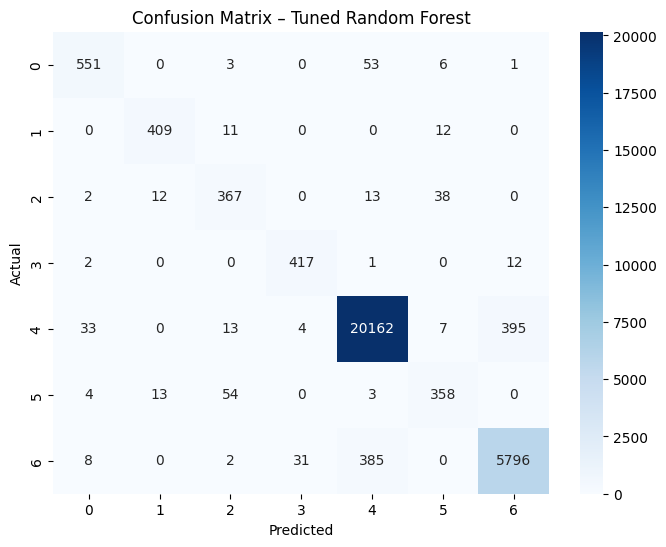

In [ ]:
cm = confusion_matrix(y_test, y_pred_tuned)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix – Tuned Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
print(classification_report(y_test, y_pred_tuned))


              precision    recall  f1-score   support

           0       0.92      0.90      0.91       614
           1       0.94      0.95      0.94       432
           2       0.82      0.85      0.83       432
           3       0.92      0.97      0.94       432
           4       0.98      0.98      0.98     20614
           5       0.85      0.83      0.84       432
           6       0.93      0.93      0.93      6222

    accuracy                           0.96     29178
   macro avg       0.91      0.91      0.91     29178
weighted avg       0.96      0.96      0.96     29178



In [ ]:
import joblib


In [ ]:
joblib.dump(best_rf, "random_forest_model.pkl")


['random_forest_model.pkl']

In [ ]:
joblib.dump(label_encoder, "label_encoder.pkl")


['label_encoder.pkl']

In [ ]:
joblib.dump(best_rf.feature_names_in_, "model_features.pkl")


['model_features.pkl']

In [ ]:
model = joblib.load("random_forest_model.pkl")
label_encoder = joblib.load("label_encoder.pkl")
model_features = joblib.load("model_features.pkl")


In [ ]:
import pandas as pd

X_new = pd.DataFrame([{
    "Elevation": 2800,
    "Aspect": 45,
    "Slope": 12,
    "Horizontal_Distance_To_Hydrology": 120,
    "Vertical_Distance_To_Hydrology": 10,
    "Horizontal_Distance_To_Roadways": 300,
    "Hillshade_9am": 210,
    "Hillshade_Noon": 230,
    "Hillshade_3pm": 180,
    "Horizontal_Distance_To_Fire_Points": 450
}])


In [ ]:
X_new_aligned = X_new.reindex(
    columns=model_features,
    fill_value=0
)


In [ ]:
y_new_pred = model.predict(X_new_aligned)

final_prediction = label_encoder.inverse_transform(y_new_pred)

final_prediction


array(['Lodgepole Pine'], dtype=object)

In [ ]:
pd.Series(y_train).value_counts(normalize=True)


,proportion
4,0.706500
6,0.213243
0,0.021035
1,0.014806
5,0.014806
3,0.014806
2,0.014806
